In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


11501568/11490434 [==============================] - 0s 0us/step
x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [3]:
model = Sequential()

# Convolution 1
model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=5, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

# Convolution 2
model.add(Conv2D(kernel_size=5, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
hist = model.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=50, validation_data=(x_test.reshape(-1,28,28,1), t_test))

Epoch 1/50
1200/1200 [==============================] - 20s 8ms/step - loss: 0.1370 - accuracy: 0.9580 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 2/50
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0365 - val_accuracy: 0.9876
Epoch 3/50
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0304 - val_accuracy: 0.9895
Epoch 4/50
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0280 - val_accuracy: 0.9901
Epoch 5/50
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0313 - val_accuracy: 0.9904
Epoch 6/50
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0293 - val_accuracy: 0.9913
Epoch 7/50
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0404 - val_accurac

In [6]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0538 - accuracy: 0.9938


[0.05383225157856941, 0.9937999844551086]

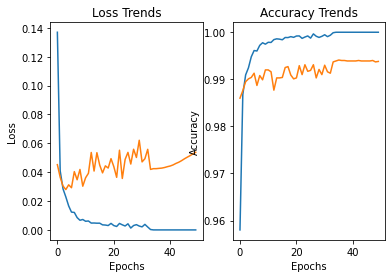

In [7]:
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trends')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [8]:
ret_val = model.predict(x_test.reshape(-1,28,28,1))

print(f'ret_val.type : {type(ret_val)}, ret_val.shape : {ret_val.shape}')

predicted_val = np.argmax(ret_val,axis=1)

predicted_comp_list = np.equal(predicted_val, t_test)

index_label_prediction = [ [index, t_test[index], predicted_val[index]] for index, result in enumerate(predicted_comp_list) if result == False ]

print(len(index_label_prediction))



ret_val.type : <class 'numpy.ndarray'>, ret_val.shape : (10000, 10)
62


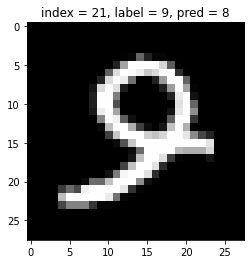

In [9]:
false_data_index = np.random.randint(len(index_label_prediction))

mnist_index = index_label_prediction[false_data_index][0]
label = index_label_prediction[false_data_index][1]
prediction = index_label_prediction[false_data_index][2]

title_str = f'index = {false_data_index}, label = {label}, pred = {prediction}'

img = x_test[mnist_index].reshape(28,28)

plt.title(title_str)
plt.imshow(img,cmap='gray')
plt.show()